# import library

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
from PIL import Image

# load dataset and convert to dataframe

In [2]:
data = 'dataset'

paths = [path.parts[-2:] for path in
         Path(data).rglob('*.*')]                             #writing purpose ('*.*') so that all image formats can be retrieved
df = pd.DataFrame(data=paths, columns=['Class','Images'])     #create column names for dataframe
df = df.sort_values('Class',ascending=True)                   #sort class name
df.reset_index(drop=True, inplace=True)                       #sort index of each row
df    

,Class,Images
0,Bacterialblight,BACTERAILBLIGHT3_001.jpg
1,Bacterialblight,BACTERIALBLIGHT2_006.jpg
2,Bacterialblight,BACTERIALBLIGHT2_005.jpg
3,Bacterialblight,BACTERIALBLIGHT2_004.jpg
4,Bacterialblight,BACTERIALBLIGHT2_003.jpg
...,...,...
5927,Tungro,TUNGRO2_155.JPG
5928,Tungro,TUNGRO2_154.JPG
5929,Tungro,TUNGRO2_153.JPG
5930,Tungro,TUNGRO2_171.JPG


# EDA

## identifying class

In [3]:
print('Count the number of image datasets')
print("Image Count : {}".format(len(df.Images)))
print("Class Count : {} \n".format(len(df['Class'].value_counts())))
print('Count the number of images in each class')
print(df['Class'].value_counts())

Count the number of image datasets
Image Count : 5932
Class Count : 4 

Count the number of images in each class
Class
Brownspot          1600
Bacterialblight    1584
Blast              1440
Tungro             1308
Name: count, dtype: int64


Text(0, 0.5, 'Count Image')

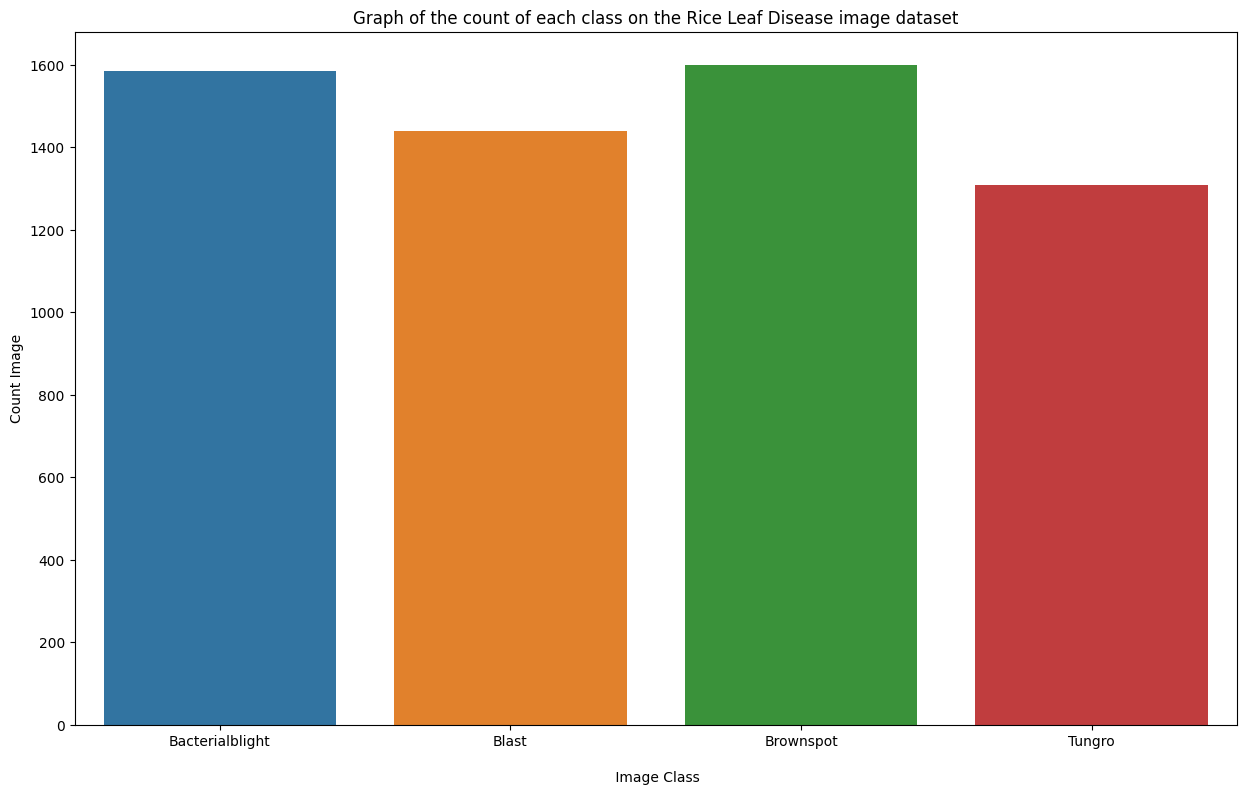

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(15,9))
sns.countplot(data=df, x='Class')
plt.title('Graph of the count of each class on the Rice Leaf Disease image dataset')
plt.xlabel('\n Image Class')
plt.ylabel('Count Image')

In [5]:
Class_Id_Dist_Total = df['Class'].value_counts(sort=False)

import plotly.express as px
fig=px.pie(Class_Id_Dist_Total,values= 'count', names=df['Class'].unique(),hole=0.500)
fig.update_layout(title='Data Distribution of Rice Leaf Disease Image Dataset',font_size=15,title_x=0.45,annotations=[dict(text='Rice Leaf Disease',font_size=12, showarrow=False,height=1000,width=1000)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

## Plotting Image Size

In [6]:
directories = {'Bacterialblight': 'dataset/Bacterialblight/',
  'Blast': 'dataset/Blast/',
  'Brownspot': 'dataset/Brownspot/',
  'Tungro': 'dataset/Tungro/'}

def get_dims(file):
  im = Image.open(file)
  arr = np.array(im)
  h,w,d = arr.shape
  return h,w

[########################################] | 100% Completed | 2.41 ss
[########################################] | 100% Completed | 2.32 ss
[########################################] | 100% Completed | 2.30 ss
[########################################] | 100% Completed | 2.42 ss


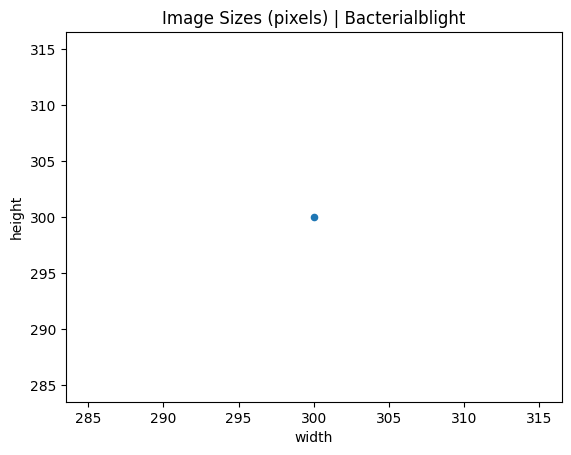

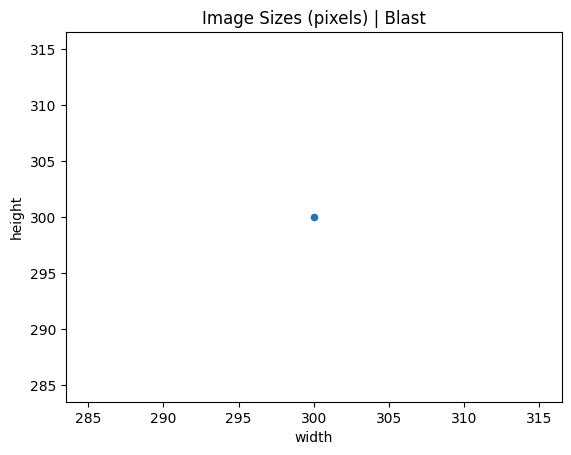

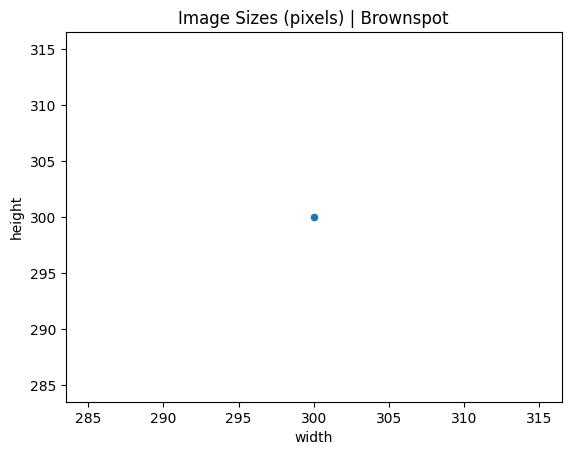

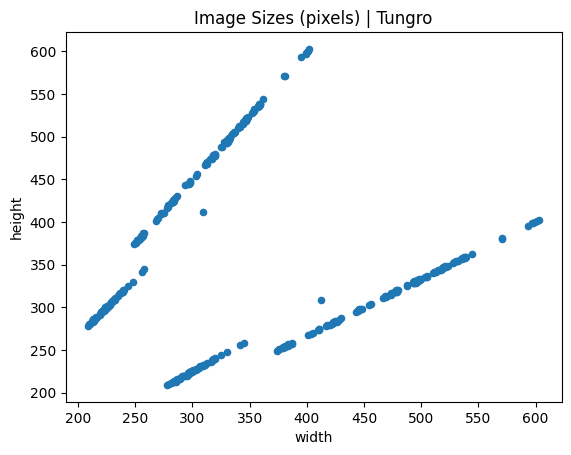

In [7]:
import os
import dask.bag as db
import dask.array as da
from dask.diagnostics import ProgressBar
import matplotlib.pyplot as plt

for n,d in directories.items():
  filepath = d
  filelist = [filepath + f for f in os.listdir(filepath)]
  dims = db.from_sequence(filelist).map(get_dims)
    
  with ProgressBar():
    dims = dims.compute()
    dim_df = pd.DataFrame(dims, columns=['height', 'width'])
    sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
    sizes.plot.scatter(x='width', y='height');
    plt.title('Image Sizes (pixels) | {}'.format(n))

## Viewing a Sampling of Images

In [8]:
import cv2

# Define the function to load each image class (target) stored by individual directory. 
# Each class directory containing their respective images
def load_image_class_by_directory(image_dir):
    # Load and resize images
    image_files = os.listdir(image_dir)
    images = []
    for file in image_files:
        if file.endswith('.jpg') or file.endswith('.JPG'):  # Assuming images are in jpg or JPG format
            image_path = os.path.join(image_dir, file)
            resized_image = image = cv2.imread(image_path)
            images.append(resized_image)

    print(f"Num of images: {len(images)}")        
    print(f"Single image shape before flattening: {images[0].shape}")
    return images

In [9]:
# Display some images
def display_images(images, num_images_to_display = 6):
    fig, axes = plt.subplots(1, num_images_to_display, figsize=(20, 5))
    for i in range(num_images_to_display):
        # Convert the image to a supported depth (e.g., CV_8U) before color conversion
        image = images[i].astype(np.uint8)
        axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying with matplotlib
        axes[i].axis('off')
    plt.show()

Num of images: 1584
Single image shape before flattening: (300, 300, 3)


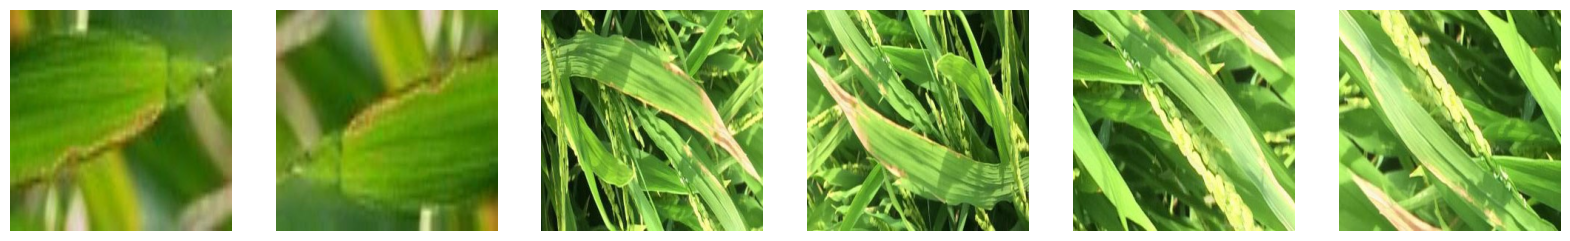

In [10]:
# Define the directory containing images
image_dir = "dataset/Bacterialblight"
images_Bacterialblight = load_image_class_by_directory(image_dir)
display_images(images_Bacterialblight)

Num of images: 1440
Single image shape before flattening: (300, 300, 3)


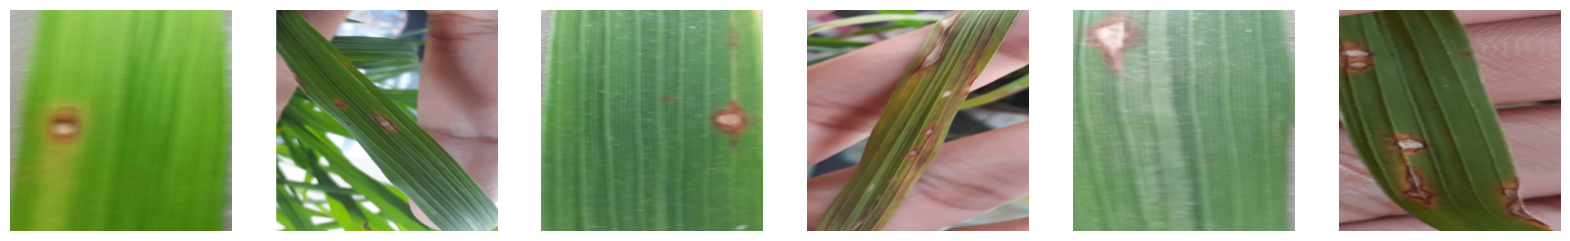

In [11]:
# Define the directory containing images
image_dir = "dataset/Blast"
images_Blast = load_image_class_by_directory(image_dir)
display_images(images_Blast)

Num of images: 1600
Single image shape before flattening: (300, 300, 3)


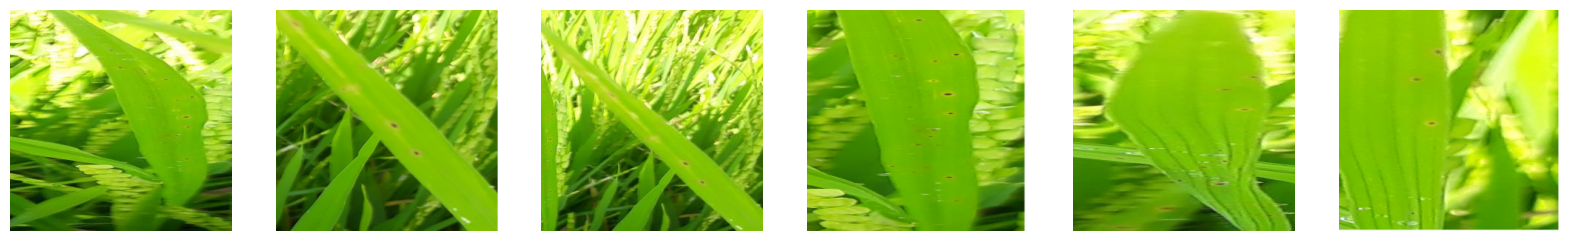

In [12]:
# Define the directory containing images
image_dir = "dataset/Brownspot"
images_Brownspot = load_image_class_by_directory(image_dir)
display_images(images_Brownspot)

Num of images: 1308
Single image shape before flattening: (287, 215, 3)


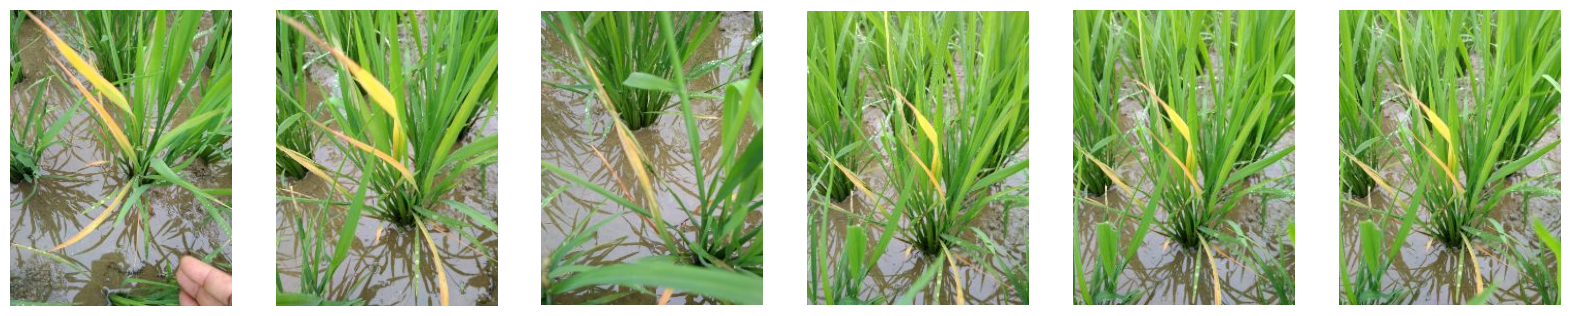

In [13]:
# Define the directory containing images
image_dir = "dataset/Tungro"
images_Tungro = load_image_class_by_directory(image_dir)
display_images(images_Tungro)